In [28]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('cards_new.jpg', cv2.IMREAD_GRAYSCALE)
edge3 = cv2.Canny(img, 170, 200)

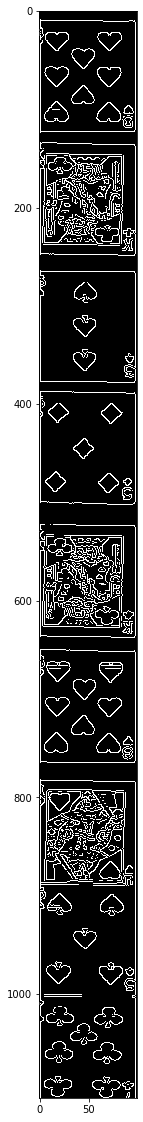

In [6]:
plt.figure(figsize=(30,20))
plt.imshow(edge3, cmap="gray")

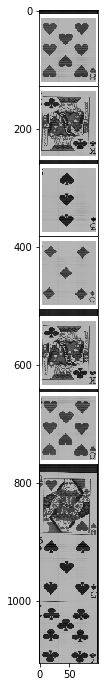

In [7]:
contours, hierarchy = cv2.findContours(edge3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=95)&(w<=100)&(h>=113)&(h<=117))]
imgimg=img.copy()
for rect in rects2:
    # Draw the rectangles
    cv2.rectangle(imgimg, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (255, 255, 255), 5) 

plt.figure(figsize=(15,12))
plt.imshow(imgimg,cmap="gray")

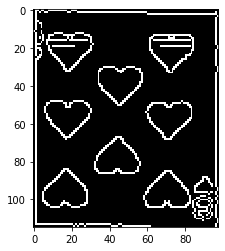

In [8]:
plt.figure()
rect = rects2[0]
img2=img.copy()
card = img2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
edge_card = cv2.Canny(card, 170, 200)
plt.imshow(edge_card,cmap="gray")

In [10]:
rects2

[(0, 650, 98, 115),
 (1, 522, 97, 116),
 (1, 387, 97, 116),
 (1, 264, 97, 115),
 (0, 134, 98, 116),
 (0, 9, 98, 116)]

In [2]:
from sklearn.externals import joblib
lr_num_pca_100 = joblib.load('./models/lr_num_pca_100.pkl') 
lr_num_raw = joblib.load('./models/lr_num_raw.pkl') 
lr_shape_pca_200 = joblib.load('./models/lr_shape_pca_200.pkl') 
lr_shape_raw = joblib.load('./models/lr_shape_raw.pkl')

rnd_num_raw = joblib.load('./models/rnd_num_raw.pkl') 
rnd_shape_raw = joblib.load('./models/rnd_shape_raw.pkl') 

svc_num_pca_100 = joblib.load('./models/svc_num_pca_100.pkl') 
svc_num_raw = joblib.load('./models/svc_num_raw.pkl') 
svc_shape_pca_200 = joblib.load('./models/svc_shape_pca_200.pkl') 
svc_shape_raw = joblib.load('./models/svc_shape_raw.pkl')

In [35]:
pca_num_save=pd.read_csv("./models/pca_num_save.csv",index_col=0)
pca_shape_save=pd.read_csv("./models/pca_shape_save.csv",index_col=0)
pca_num_save=np.array(pca_num_save)
pca_shape_save=np.array(pca_shape_save)

logistic regression result : ['H'], ['8']
logistic regression result : ['H'], ['K']
logistic regression result : ['D'], ['A']
logistic regression result : ['D'], ['3']
logistic regression result : ['H'], ['K']
logistic regression result : ['H'], ['8']


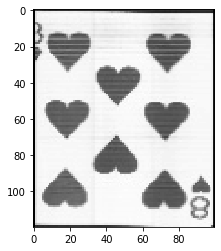

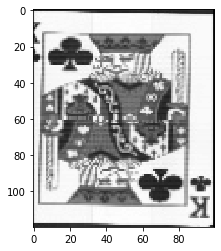

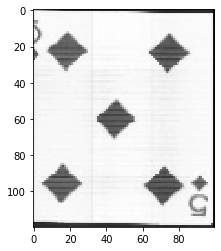

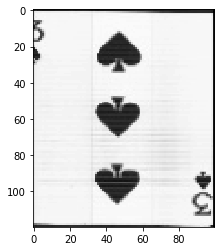

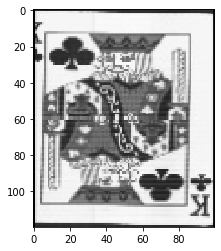

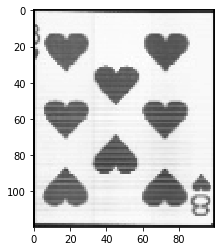

In [25]:
for i in range(len(rects2)):
    rect = rects2[i]
    img2 = img.copy()
    card = img2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    card_resize = cv2.resize(card, (100, 120), interpolation=cv2.INTER_AREA)
    plt.figure()
    plt.imshow(card_resize, cmap="gray")
    card_resize = card_resize.reshape(1, -1)
    print("logistic regression result : %s, %s"%(lr_shape_raw.predict(card_resize),lr_num_raw.predict(card_resize)))

svc result : ['H'], ['K']
svc result : ['C'], ['K']
svc result : ['H'], ['Q']
svc result : ['H'], ['K']
svc result : ['C'], ['K']
svc result : ['H'], ['Q']


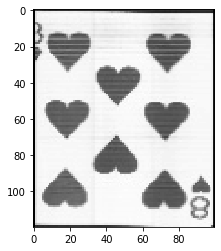

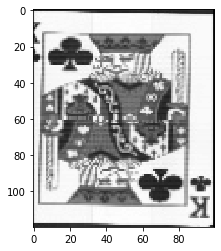

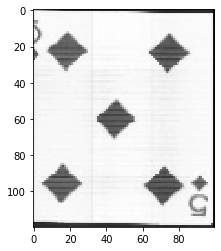

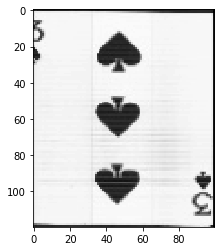

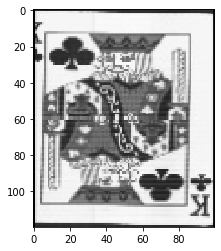

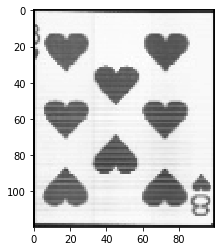

In [26]:
for i in range(len(rects2)):
    rect = rects2[i]
    img2 = img.copy()
    card = img2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    card_resize = cv2.resize(card, (100, 120), interpolation=cv2.INTER_AREA)
    plt.figure()
    plt.imshow(card_resize, cmap="gray")
    card_resize = card_resize.reshape(1, -1)
    print("svc result : %s, %s"%(svc_shape_raw.predict(card_resize),svc_num_raw.predict(card_resize)))

RandomForest result : ['D'], ['K']
RandomForest result : ['C'], ['J']
RandomForest result : ['H'], ['K']
RandomForest result : ['H'], ['K']
RandomForest result : ['C'], ['J']
RandomForest result : ['H'], ['Q']


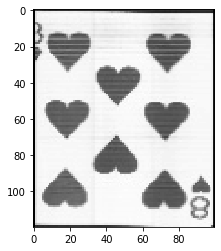

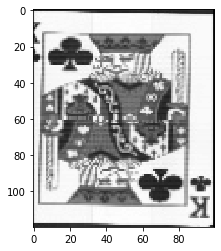

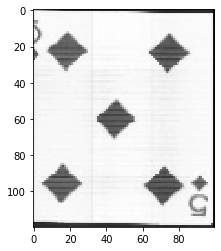

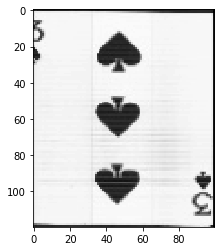

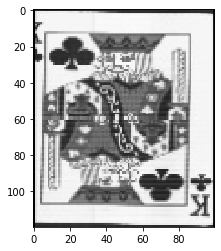

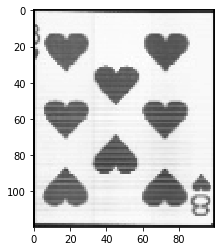

In [27]:
for i in range(len(rects2)):
    rect = rects2[i]
    img2 = img.copy()
    card = img2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    card_resize = cv2.resize(card, (100, 120), interpolation=cv2.INTER_AREA)
    plt.figure()
    plt.imshow(card_resize, cmap="gray")
    card_resize = card_resize.reshape(1, -1)
    print("RandomForest result : %s, %s"%(rnd_shape_raw.predict(card_resize),rnd_num_raw.predict(card_resize)))

In [ ]:
X_test_num_reduced=np.dot(pca_num_shape,X_test_num.T)

## PCA 쓴 결과

logistic regression result : ['H'], ['8']
logistic regression result : ['H'], ['K']
logistic regression result : ['D'], ['A']
logistic regression result : ['D'], ['3']
logistic regression result : ['H'], ['K']
logistic regression result : ['H'], ['8']


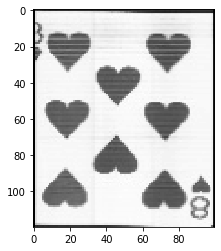

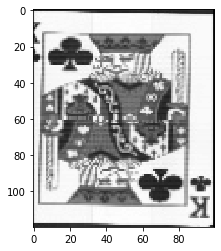

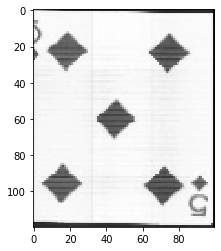

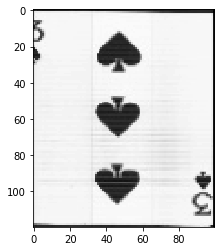

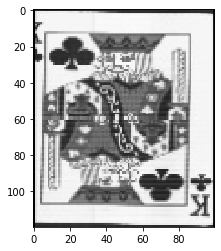

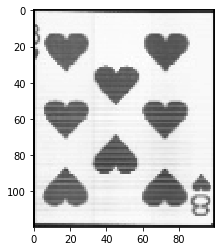

In [49]:
for i in range(len(rects2)):
    rect = rects2[i]
    img2 = img.copy()
    card = img2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    card_resize = cv2.resize(card, (100, 120), interpolation=cv2.INTER_AREA)
    plt.figure()
    plt.imshow(card_resize, cmap="gray")
    card_resize = card_resize.reshape(1, -1)
    card_shape = np.dot(pca_shape_save,card_resize.T)
    card_shape = card_shape.reshape(1,-1)
    card_num = np.dot(pca_num_save,card_resize.T)
    card_num = card_num.reshape(1,-1)
    print("logistic regression result : %s, %s"%(lr_shape_pca_200.predict(card_shape),lr_num_pca_100.predict(card_num)))

svc result : ['H'], ['K']
svc result : ['C'], ['K']
svc result : ['H'], ['Q']
svc result : ['H'], ['K']
svc result : ['C'], ['K']
svc result : ['H'], ['Q']


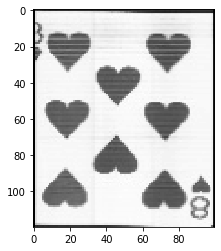

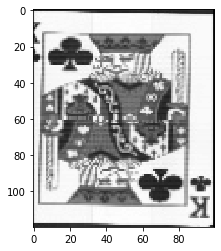

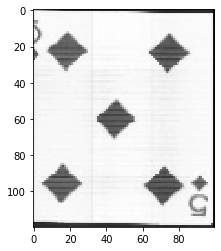

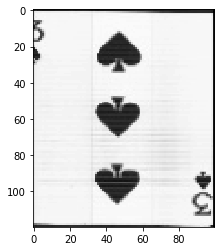

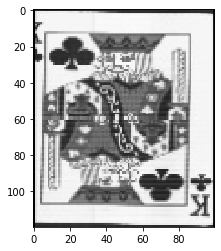

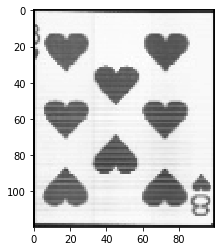

In [50]:
for i in range(len(rects2)):
    rect = rects2[i]
    img2 = img.copy()
    card = img2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    card_resize = cv2.resize(card, (100, 120), interpolation=cv2.INTER_AREA)
    plt.figure()
    plt.imshow(card_resize, cmap="gray")
    card_resize = card_resize.reshape(1, -1)
    card_shape = np.dot(pca_shape_save,card_resize.T)
    card_shape = card_shape.reshape(1,-1)
    card_num = np.dot(pca_num_save,card_resize.T)
    card_num = card_num.reshape(1,-1)
    print("svc result : %s, %s"%(svc_shape_pca_200.predict(card_shape),svc_num_pca_100.predict(card_num)))
    